In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from random import uniform

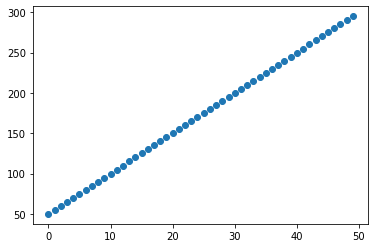

In [58]:
def linear_dataset(count=50, y_intercept=0, slope=1, spread=1.0):
    X = np.array([i+(uniform(-spread, spread)) for i in range(count)])
    y = np.array([y_intercept+i*slope+(uniform(-spread, spread)) for i in range(count)])
    return X, y

data_X, data_y = linear_dataset(50, 50.0, 5, 0)
plt.scatter(data_X, data_y)

50.0 50.0
est 1617.0000867532508
exact 49.0


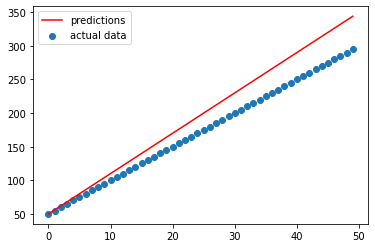

In [69]:
h0 = 50
h1 = 6

def forward(xdata, h0, h1):
    return h0+xdata*h1

def cost(h0, h1, xdata, ydata):
    a = forward(xdata, h0, h1)
    return (1/len(ydata))*(np.sum((ydata-a)**2))

preds = forward(data_X, h0, h1)

plt.plot(data_X, preds, c='r')
plt.scatter(data_X, data_y)
print(preds[0], data_y[0])
plt.legend(['predictions', 'actual data'])

def derive(h0, h1, xdata, ydata):
    delta = 0.0000001
    a = cost(h0, h1+delta, xdata, ydata) - cost(h0, h1, xdata, ydata)
    return a/delta

print('est', derive(h0, h1, data_X, data_y))
der = (-2/len(data_y))*((np.sum(data_y-preds)))
print('exact', der)

-808.4999237648375 -8084.999899438117 6468.0000104999635


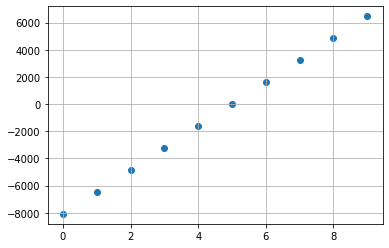

-24.5 -245.0 196.0


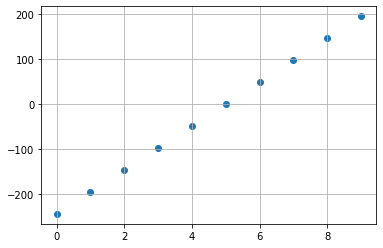

In [162]:
lol, lol2 = np.zeros(10), np.zeros(10)
for i in range(0, 10):
    lol[i] = derive(h0, i, data_X, data_y)
    preds = forward(data_X, h0, i)
    lol2[i] = (-2/len(data_y))*((np.sum(data_y-preds)))
    
plt.scatter([*range(0,10)], lol)
plt.grid()
print(lol.mean(), lol.min(), lol.max())
plt.show()
plt.scatter([*range(0,10)], lol2)
plt.grid()
print(lol2.mean(), lol2.min(), lol2.max())

In [170]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def reset_data():
    dataset = pd.read_csv("./datasets/Salary_Data.csv")
    dataset = dataset.sample(frac=1).reset_index(drop=True)
    dataset = dataset.to_numpy()
    X, y = dataset[:,0], dataset[:,1]
    return (X, y)

(30,)
(1, 30)


(1.1102230246251566e-17, -1.419918996008276, 1.72102849045861, 1.0)

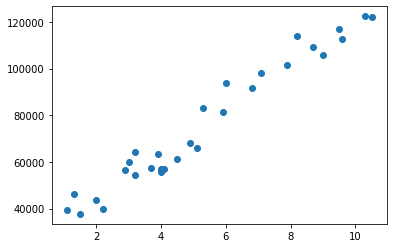

In [171]:
X, y = reset_data()
plt.scatter(X, y)

scaler = StandardScaler()
print(y.shape)
print(y.reshape(1, -1).shape)
y = y.reshape(-1, 1)
scaler.fit(y)
y = scaler.transform(y)
y.mean(), y.min(), y.max(), y.std()

100%|████████████████████████████████████| 10000/10000 [00:00<00:00, 42713.11it/s]


first loss 6759207127.900001
last loss  34095541.18633836
loss delta 6725111586.713662

26927.98830910545 9248.35378954111


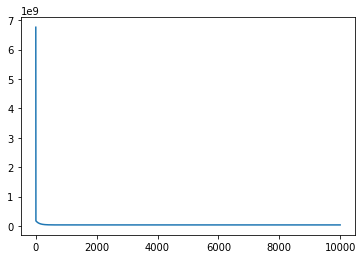

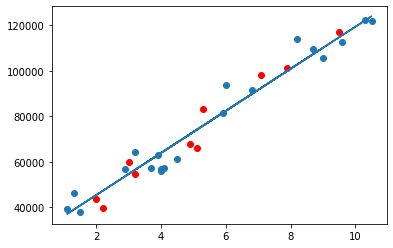

In [227]:
X, y = reset_data()

#y = (y-np.min(y)) / (np.max(y)-np.min(y))
#y.mean(), y.min(), y.max(), y.std()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

h0 = 50
h1 = 10

lr = 0.01
n_epochs = 10000

losses = []

for i in tqdm(range(n_epochs)):
    
    loss = cost(h0, h1, X_train, y_train)
    
    preds = forward(X_train, h0, h1)
    dd_h0 = (-2/len(y_train))*(np.sum((y_train-preds)))
    dd_h1 = (-2/len(y_train))*(np.sum((y_train-preds)*X_train))
    h0 -= dd_h0*lr
    h1 -= dd_h1*lr
    losses.append(loss)
print('first loss', losses[0])
print('last loss ', losses[len(losses)-1])
print('loss delta', np.abs(losses[0]-losses[len(losses)-1]))
print()
plt.plot(losses)   
print(h0, h1)
plt.show()

plt.plot(X_train, forward(X_train, h0, h1))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, c='r')

In [228]:
X, y = reset_data()

y = ((y-y.mean())/y.std())
y.mean(), y.min(), y.max(), y.std()

(2.590520390792032e-17,
 -1.419918996008276,
 1.72102849045861,
 0.9999999999999999)